'<!DOCTYPE html>\n<html>\n    <head>\n                <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=1.0,user-scalable=0,viewport-fit=cover">\n<link rel="shortcut icon" type="image/x-icon" href="//res.wx.qq.com/a/wx_fed/assets/res/NTI4MWU5.ico">\n<link rel="mask-icon" href="//res.wx.qq.com/a/wx_fed/assets/res/MjliNWVm.svg" color="#4C4C4C">\n<link rel="apple-touch-icon-precomposed" href="//res.wx.qq.com/a/wx_fed/assets/res/OTE0YTAw.png">\n<meta name="apple-mobile-web-app-capable" content="yes">\n<meta name="apple-mobile-web-app-status-bar-style" content="black">\n<meta name="color-scheme" content="light dark">\n<meta name="format-detection" content="telephone=no">\n\n\n        \n\n  \n  <meta name="description" content="Python 爬虫入门（一）——爬取糗事百科" />\n  <meta name="author" content="李英杰同学" />\n\n  \n  <meta property="og:title" content=
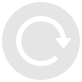
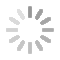
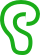
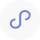
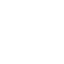
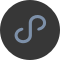

In [1]:
import requests
r=requests.get("https://mp.weixin.qq.com/s/ApnEy6NWS2f-DqIIrhHzGw")
r.text

Beautiful Soup库介绍
拿到网页信息后，我们通常有以下几种方式来解析页面，获取我们所需要的信息
+ 正则表达式
+ Lxml Lxml是专门用来解析XML格式文件的库，该模块用c语言编写，解析速度很快，和正则表达式速度差不多，但是提供了XPath和CSS选择器等定位元素的方法
+ beautiful Soup 这是一个python解析库，相比较于前两种来说，语法会更简单明了一些，文档也比较详细，唯一的缺点是运行速度是前两种的方式慢几倍。当数据量非常大时候，会更多

In [16]:
import bs4
from bs4 import BeautifulSoup
soup=BeautifulSoup(open("./example1.html"),"html.parser") # ANSI格式
soup.find('div')

<div class="main-page">
<ul class="menu-list">
<li>首页</li>
<li>新闻</li>
<li>影视</li>
</ul>
</div>

In [3]:
print(soup.prettify) # 格式化输出，这个函数经常用到

<bound method Tag.prettify of html&gt;
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta></head>
<body>
<div class="main-page">
<ul class="menu-list">
<li>首页</li>
<li>新闻</li>
<li>影视</li>
</ul>
</div>
<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
</body>
>


### 四大对象种类
Beautiful Soup将复杂的html文档换成一个复杂的树形结构，每个节点都是python对象，所有对象可以分为四种
+ Tag 就是html的一个个标签，有两个重要属性name和attrs
+ NavigableString 我们得到标签的name和attr,我们想得到标签内部的文字怎么办呢？用.string即可。这样我们就可以轻松获得标签里边的内容,NavigableString就是可以遍历的字符串，
+ BeautifulSoup 表示的是文档的全部内容，大部分时候，可以把Tag当做对象，
+ Comment 是一个特殊类型的NavigableString对象，

In [5]:
print(soup.title)
print(soup.name)
print(soup.head.name)
print(soup.div.name)
print(soup.a.attrs) # 某一标签下的所有属性

<title>Page Title</title>
[document]
head
div
{'href': 'http://example.com/elsie', 'class': ['sister'], 'id': 'link1'}


In [7]:
print(soup.a["class"]) # attrs 
print(soup.a.get("id"))

['sister']
link1


In [10]:
print(soup.a.string) # navigable string
print(type(soup.a.string))

 Elsie 
<class 'bs4.element.Comment'>


In [11]:
print(type(soup.name))

<class 'str'>


In [12]:
# comment
print(soup.a) # a表亲里面的内容实际是注释，如果我们利用.string来输出的话，我们发现已经
# 把注释符号去掉了

<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>


In [17]:
if type(soup.a.string)==bs4.element.Comment:
    print(soup.a.string)

 Elsie 


### 遍历文档树
直接子节点：
+ tag的.content属性可以将tag的子节点以列表的方式输出  
+ .child属性，他返回的不是一个list,不过我们可以通过遍历获取所有的子节点

所有子孙节点：
+ .descendants上面介绍的.content和.child属性仅包含tag的直接子节点，.descendants可以对所有的tag子孙节点递归循环输出
父节点：
+ .parent .parents  
兄弟节点：
+ .next_sibling .previous_sibling

In [18]:
print(soup.head.contents) # 输出方式为列表

['\n', <meta charset="utf-8"/>, '\n', <meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>]


In [21]:
print(soup.head.children) # 发现是一个list生成器
for child in soup.head.children: # 打印tag里边的子节点
    print(child)



<meta charset="utf-8"/>


<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>


In [26]:
for chind in soup.div.descendants:
    print(child)

<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<title>Page Title</title>
</meta>
<meta content="IE=edge" http-equ

### 搜索文档树
find_all(name,attrs,recursive,text,\*\*kwargs)
+ name
    + name 查找所有名字为name的tag
    + re.comple("^b") 传正则表达式
    + 传list
    + 传True,可以匹配人设值
    + 传方法
+ keyword 如果一个指定的名字的参数不是搜索内置的参数名，搜索时后把该参数当作指定名字tag属性搜索，如果名字包含一个id的参数，Beautiful Soup会搜索每个tag的"id"属性
+ text 可以搜索文档中的字符串的内容，接受字符串，正则表达式
+ limit find_all()返回全部的搜索结构，如果文档很大的话，就很慢，我们不需要全部的结果，可以使用limit限制返回的数量
+ recursive 决定要不要检索所有的子孙节点，recursive=False

In [28]:
print(soup.find_all("a"))

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [35]:
import re
for tag in soup.find_all(re.compile("^b")): # 传正则表达式
    print(tag)


<body>
<div class="main-page">
<ul class="menu-list">
<li>首页</li>
<li>新闻</li>
<li>影视</li>
</ul>
</div>
<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
</body>


In [36]:
print(soup.find_all(id="link1")) # keyword,独特之处在于传递的是一字典值

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>]


In [42]:
print(soup.find_all(href=re.compile("http*"))) # keyword 传递

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


这里我们想用class过滤，不多class时python的关键词，怎么办，加个下划线就可以了

In [50]:
print(soup.find_all(class_="sister",limit=1)) # limit限制输出数目

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>]


In [47]:
print(soup.find_all(text=re.compile("La*")))

['Lacie']


### CSS选择器
我们再写css时候， 标签名不加任何修饰，类名前加点，id名前加#,我们可以类似的方法来筛选元素。用到的方法是soup.select(),返回类型是list

In [53]:
print(soup.select("a")) # 输出的是一个list

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [55]:
print(soup.select(".sister"))  # 类名前面加点

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [56]:
print(soup.select("#link1")) # id名字前面加#号

[<a class="sister" href="http://example.com/elsie" id="link1"><!-- Elsie --></a>]


In [57]:
print(soup.select("a#link2")) # 组合查找

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]
